In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel('/content/heart_disease.xlsx')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


In [ ]:
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [ ]:
df[df['RestingBP'] == 0].shape[0]

1

In [ ]:
mean_resting_bp = df['Cholesterol'].mean()
df['Cholesterol'] = df['Cholesterol'].replace(0, mean_resting_bp)

In [ ]:
mean_resting_bp = df['RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].replace(0, mean_resting_bp)

In [ ]:
df[df['RestingBP'] == 0].shape[0]

0

In [ ]:
df[df['Cholesterol'] == 0].shape[0]

0

In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
198.799564,172
254.000000,11
220.000000,10
223.000000,10
204.000000,9
...,...
353.000000,1
278.000000,1
157.000000,1


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [ ]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [ ]:
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [ ]:
df['ChestPainType'] = df['ChestPainType'].map({'ATA':1, 'NAP':2, 'ASY':3, 'TA':4})
df['Sex'] = df['Sex'].map({'M':1, 'F':2})
df['RestingECG'] = df['RestingECG'].map({'Normal':1, 'ST':2, 'LVH':3})
df['ST_Slope'] = df['ST_Slope'].map({'Flat':1, 'Up':2,'Down':3})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':1, 'Y':2})

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172,1,0.0,2,0
1,49,2,2,160.0,180.0,0,1,156,1,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98,1,0.0,2,0
3,48,2,3,138.0,214.0,0,1,108,2,1.5,1,1
4,54,1,2,150.0,195.0,0,1,122,1,0.0,2,0


In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140.0,289.0,0,1,172,1,0.0,2
1,49,2,2,160.0,180.0,0,1,156,1,1.0,1
2,37,1,1,130.0,283.0,0,2,98,1,0.0,2
3,48,2,3,138.0,214.0,0,1,108,2,1.5,1
4,54,1,2,150.0,195.0,0,1,122,1,0.0,2


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-1.4331398 , -0.51595242, -1.70557305, ..., -0.8235563 ,
        -0.83243239,  0.6990726 ],
       [-0.47848359,  1.93816322, -0.53099236, ..., -0.8235563 ,
         0.10566353, -0.91742273],
       [-1.75135854, -0.51595242, -1.70557305, ..., -0.8235563 ,
        -0.83243239,  0.6990726 ],
       ...,
       [ 0.37009972, -0.51595242,  0.64358833, ...,  1.21424608,
         0.29328271, -0.91742273],
       [ 0.37009972,  1.93816322, -1.70557305, ..., -0.8235563 ,
        -0.83243239, -0.91742273],
       [-1.64528563, -0.51595242, -0.53099236, ..., -0.8235563 ,
        -0.83243239,  0.6990726 ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(734, 11)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
model = logistic_model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test[:3]

,HeartDisease
668,0
30,1
377,1


In [ ]:
y_pred[:3]

array([0, 0, 1])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

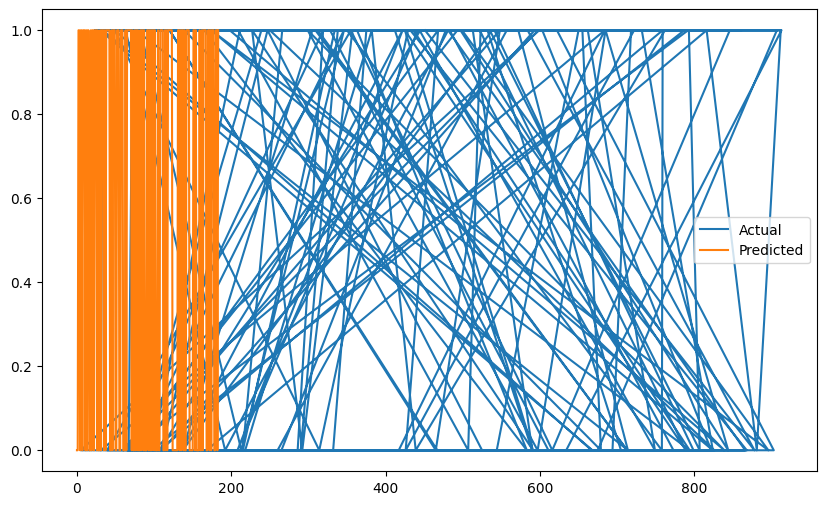

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt